In [4]:
import requests
from bs4 import BeautifulSoup
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

candidate_info_links ={}

for i in range(1,295):
    session = requests.Session()
    retry = Retry(connect=5, backoff_factor=0.5)
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    response = session.get('https://myneta.info/westbengal2016/index.php?action=show_candidates&constituency_id={}'.format(i))

    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', id = 'table1')
    links =[]
    for row in table.find_all('td'):
        if row.a == None:
            continue
        else:
            links.append(row.a['href'])
    links = links[:3]
    new_links = []
    for link in links:
        link = 'https://myneta.info/westbengal2016/' + link
        new_links.append(link)
    candidate_info_links.update({i : new_links})
        


In [7]:
win_names = []
win_party = []
win_cons = []
win_email = []
win_mob =[]
ru1_names = []
ru1_party = []
ru1_cons = []
ru1_email = []
ru1_mob =[]
ru2_names = []
ru2_party = []
ru2_cons = []
ru2_email = []
ru2_mob =[]
win_age = []
ru1_age = []
ru2_age = []
win_wealth =[]
ru1_wealth = []
ru2_wealth = []


for ac_no in range(1,295):
    print(ac_no)
    for position in range(3):
        req_get = requests.get(candidate_info_links[ac_no][position])
        soup = BeautifulSoup(req_get.text, 'html.parser')
        name = soup.find('h2', class_ = 'main-title')
        name = name.text
        cons = soup.find('h5')
        cons = cons.text[9:-9]
        money = soup.find('div', class_ = "bottom-border-div red fullWidth")
        list_money = money.b.text[3:].split(",")
        money = "".join(list_money)
        
        for grid_2 in soup.find_all('div', class_ = 'grid_2 alpha' ):
            if grid_2.b.text == 'Party:':
                party = grid_2.text[7:]
            elif grid_2.b.text == 'Age:':
                age = int(grid_2.text[6:-9])
            elif grid_2.b.text == 'Email:':
                email = grid_2.text[6:]
            elif grid_2.b.text == 'Contact Number:':
                mob = grid_2.text[16:]
        
        if position == 0:
            win_names.append(name[:-9])
            win_cons.append(cons)
            win_party.append(party)
            win_age.append(age)
            win_email.append(email)
            win_mob.append(mob)
            try:
                win_wealth.append(int(money))
            except ValueError:
                win_wealth.append(0)
    
        if position == 1:
            ru1_names.append(name)
            ru1_cons.append(cons)
            ru1_party.append(party)
            ru1_age.append(age)
            ru1_email.append(email)
            ru1_mob.append(mob)
            try:
                ru1_wealth.append(int(money))
            except ValueError:
                ru1_wealth.append(0)
            
        if position ==2:
            ru2_names.append(name)
            ru2_cons.append(cons)
            ru2_party.append(party)
            ru2_age.append(age)
            ru2_email.append(email)
            ru2_mob.append(mob)
            try:
                ru2_wealth.append(int(money))
            except ValueError:
                ru2_wealth.append(0)
            
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


age = []
party = []
mob = []
email = []
for grid_2 in soup.find_all('div', class_ = 'grid_2 alpha' ):
    if grid_2.b.text == 'Party:' :
        party.append(grid_2.text[7:-2])
    elif grid_2.b.text == 'Age:':
        age.append(grid_2.text[6:-9])
    elif grid_2.b.text == 'Email:':
        email.append(grid_2.text[6:])
    elif grid_2.b.text == 'Contact Number:':
        mob.append(grid_2.text[16:])

age, party ,email, mob

grid_2[4].b.text

In [8]:
winner_data = {'Candidate Name': win_names, "Party": win_party, "Constituency": win_cons,
               "Email ID": win_email, "Phone No.": win_mob, "Wealth": win_wealth}
runnerup1_data = {'Candidate Name': ru1_names, "Party": ru1_party, "Constituency": ru1_cons,
               "Email ID": ru1_email, "Phone No.": ru1_mob, "Wealth": ru1_wealth}
runnerup2_data = {'Candidate Name': ru2_names, "Party": ru2_party, "Constituency": ru2_cons,
               "Email ID": ru2_email, "Phone No.": ru2_mob, "Wealth": ru2_wealth}

In [9]:
import pandas as pd
winner_df = pd.DataFrame(winner_data)
runup1_df = pd.DataFrame(runnerup1_data)
runup2_df = pd.DataFrame(runnerup2_data)

In [11]:
winner_df

,Candidate Name,Party,Constituency,Email ID,Phone No.,Wealth
0,ARGHYA ROY PRADHAN,AITC\n,MEKLIGANJ (SC) (COOCHBEHAR),argharoy.aitmc@gmail.com,"03561-263260 , 9434806581",3870220
1,BINAY KRISHNA BARMAN,AITC\n,MATHABHANGA (SC) (COOCHBEHAR),binaykb2@gmail.com,9734153777,18335744
2,NAGENDRA NATH ROY,AIFB\n,COOCHBEHAR UTTAR (SC) (COOCHBEHAR),,9609992665,9259725
3,MIHIR GOSWAMI,AITC\n,COOCHBEHAR DAKSHIN (COOCHBEHAR),mihirgoswami54@gmail.com,9434367477,10330101
4,HITEN BARMAN,AITC\n,SITALKUCHI (SC) (COOCHBEHAR),hiten.aitc@gmail.com,03583256020,2611132
...,...,...,...,...,...,...
289,ABHIJIT ROY,AITC\n,MAYURESWAR (BIRBHUM),,8348504343,3974548
290,ASISH BANERJEE,AITC\n,RAMPURHAT (BIRBHUM),asishrph@yahoo.com,9434386498,15959415
291,MILTAN RASID,INC\n,HANSAN (BIRBHUM),,9434349272,3427605
292,MOINUDDIN SHAMS,AITC\n,NALHATI (BIRBHUM),aliafsar3850@gmail.com,"9831728786, 8282915437",32635702


In [12]:
runup1_df

,Candidate Name,Party,Constituency,Email ID,Phone No.,Wealth
0,BINOD ROY,Kamatapur Peoples Party (United)\n,MEKLIGANJ (SC) (COOCHBEHAR),,8116408881,21000
1,HAREKRISHNA SARKAR,IND\n,MATHABHANGA (SC) (COOCHBEHAR),,8016638501,424000
2,ANILCHANDRA ROY,SUCI(C)\n,COOCHBEHAR UTTAR (SC) (COOCHBEHAR),,"9474515689, 9563729373",504150
3,AKIK HOSSAIN CHOWDHURY,Kamatapur Peoples Party (United)\n,COOCHBEHAR DAKSHIN (COOCHBEHAR),kamatpurpeoplesparty@gmail.com,9818219272,113000
4,BAREN CHANDRA BARMAN,BJP\n,SITALKUCHI (SC) (COOCHBEHAR),,9932989105,2518183
...,...,...,...,...,...,...
289,ABUL KALAM AZAD,Welfare Party Of India\n,MAYURESWAR (BIRBHUM),,9733112033,670039
290,ASHIS KUMAR PAL,Mulnibasi Party of India\n,RAMPURHAT (BIRBHUM),ashishkumarpal58@gmail.com,9232681681,8509120
291,ALI TANSER,SP\n,HANSAN (BIRBHUM),,9564340238,126971
292,ABDUS SALAM,SUCI(C)\n,NALHATI (BIRBHUM),,9735588038,201500


In [13]:
runup2_df

,Candidate Name,Party,Constituency,Email ID,Phone No.,Wealth
0,DADHIRAM RAY,BJP\n,MEKLIGANJ (SC) (COOCHBEHAR),,9932347136,1264134
1,KANGSA RAJ BARMAN,Kamatapur Peoples Party (United)\n,MATHABHANGA (SC) (COOCHBEHAR),,9647722105,1548000
2,GOPAL ROY,IND\n,COOCHBEHAR UTTAR (SC) (COOCHBEHAR),,7585017585,825500
3,AMITA DAS,Amra Bangalee\n,COOCHBEHAR DAKSHIN (COOCHBEHAR),,9475837043,86000
4,FUL KUMAR BARMAN,IND\n,SITALKUCHI (SC) (COOCHBEHAR),,8158067279,105000
...,...,...,...,...,...,...
289,ARUP BAG,CPI(M)\n,MAYURESWAR (BIRBHUM),,8797624938,502333
290,DUDH KUMAR MONDAL,BJP\n,RAMPURHAT (BIRBHUM),,9800962905,3961072
291,AMAL KUMAR MONDAL,SUCI(C)\n,HANSAN (BIRBHUM),,9775719714,752000
292,ANIL SINGHA,BJP\n,NALHATI (BIRBHUM),,9474646276,4514646


In [268]:
winner_df.to_csv('Winner Data.xlsx', index = False)

In [269]:
runup1_df.to_csv('Runner up 1.xlsx', index = False)

In [270]:
runup2_df.to_csv('Runner up 2.xlsx', index = False)

In [14]:
winner_df["Age"] = win_age

In [15]:
runup1_df["Age"] = ru1_age

In [16]:
runup2_df["Age"] = ru2_age

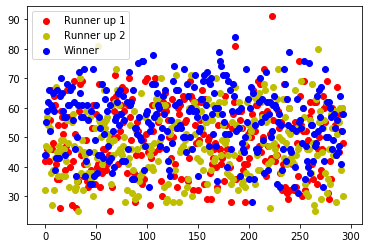

In [17]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(294)
plt.axes
plt.scatter(X, ru1_age, color = 'r', label = 'Runner up 1')
plt.scatter(X, ru2_age, color = 'y', label = 'Runner up 2')
plt.scatter(X, win_age, color ='b', label = 'Winner')
plt.legend(loc="upper left")
plt.savefig("ScatterAge.png")

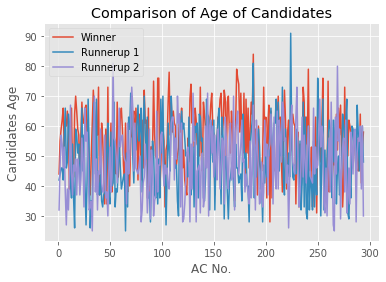

In [18]:
import numpy as np
plt.style.use("ggplot")
plt.figure()
N = np.arange(1,295)
plt.plot(N, win_age, label="Winner")
plt.plot(N, ru1_age, label="Runnerup 1")
plt.plot(N, ru2_age, label="Runnerup 2")
plt.title("Comparison of Age of Candidates")
plt.xlabel("AC No.")
plt.ylabel("Candidates Age")
plt.legend(loc="upper left")
plt.savefig("ggplotBengal.png")

In [19]:
winner_df.describe()

,Wealth,Age
count,2.940000e+02,294.000000
mean,1.480261e+07,55.346939
std,3.458823e+07,11.077544
min,4.973000e+04,28.000000
25%,2.761082e+06,47.000000
50%,5.911398e+06,56.500000
75%,1.332233e+07,63.000000
max,4.059230e+08,84.000000


In [20]:
runup1_df.describe()

,Wealth,Age
count,2.940000e+02,294.000000
mean,4.855526e+06,49.159864
std,1.614257e+07,11.898818
min,0.000000e+00,25.000000
25%,1.940178e+05,40.000000
50%,1.011221e+06,49.000000
75%,3.893584e+06,59.000000
max,1.741231e+08,91.000000


In [21]:
runup2_df.describe()

,Wealth,Age
count,2.940000e+02,294.000000
mean,3.905837e+06,48.156463
std,1.144224e+07,11.417728
min,0.000000e+00,25.000000
25%,1.568250e+05,39.000000
50%,1.139570e+06,47.000000
75%,3.520099e+06,56.000000
max,1.542042e+08,81.000000


# To check for wealth

In [22]:
winner_df.describe()

,Wealth,Age
count,2.940000e+02,294.000000
mean,1.480261e+07,55.346939
std,3.458823e+07,11.077544
min,4.973000e+04,28.000000
25%,2.761082e+06,47.000000
50%,5.911398e+06,56.500000
75%,1.332233e+07,63.000000
max,4.059230e+08,84.000000


In [23]:
runup1_df.describe()

,Wealth,Age
count,2.940000e+02,294.000000
mean,4.855526e+06,49.159864
std,1.614257e+07,11.898818
min,0.000000e+00,25.000000
25%,1.940178e+05,40.000000
50%,1.011221e+06,49.000000
75%,3.893584e+06,59.000000
max,1.741231e+08,91.000000


In [24]:
runup2_df.describe()

,Wealth,Age
count,2.940000e+02,294.000000
mean,3.905837e+06,48.156463
std,1.144224e+07,11.417728
min,0.000000e+00,25.000000
25%,1.568250e+05,39.000000
50%,1.139570e+06,47.000000
75%,3.520099e+06,56.000000
max,1.542042e+08,81.000000


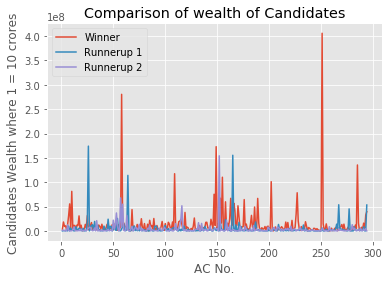

In [25]:
import numpy as np
plt.style.use("ggplot")
plt.figure()
N = np.arange(1,295)
plt.plot(N, win_wealth, label="Winner")
plt.plot(N, ru1_wealth, label="Runnerup 1")
plt.plot(N, ru2_wealth, label="Runnerup 2")
plt.title("Comparison of wealth of Candidates")
plt.xlabel("AC No.")
plt.ylabel("Candidates Wealth where 1 = 10 crores")
plt.legend(loc="upper left")
plt.savefig("Wealth.png")

In [358]:
    
req = requests.get('https://myneta.info/westbengal2016/index.php?action=show_candidates&constituency_id=253')
soup = BeautifulSoup(req.text, 'html.parser')


In [26]:
win_case = []
ru1_case = []
ru2_case = []
for i in range(1,295):
    req = requests.get('https://myneta.info/westbengal2016/index.php?action=show_candidates&constituency_id={}'.format(i))
    soup = BeautifulSoup(req.text, 'html.parser')
    print(i)
    w = 0
    for case in soup.find_all('td', align = 'center'):
        w+=1
        if w==1:
            win_case.append(int(case.text))
        elif w==2:
            ru1_case.append(int(case.text))
            
        elif w==3:
            ru2_case.append(int(case.text))
            
        else:
            continue

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [27]:
winner_df['Cases'] = win_case
runup1_df['Cases'] = ru1_case
runup2_df['Cases'] = ru2_case

In [28]:
winner_df.describe()

,Wealth,Age,Cases
count,2.940000e+02,294.000000,294.000000
mean,1.480261e+07,55.346939,1.115646
std,3.458823e+07,11.077544,2.526358
min,4.973000e+04,28.000000,0.000000
25%,2.761082e+06,47.000000,0.000000
50%,5.911398e+06,56.500000,0.000000
75%,1.332233e+07,63.000000,1.000000
max,4.059230e+08,84.000000,21.000000


In [29]:
runup1_df.describe()

,Wealth,Age,Cases
count,2.940000e+02,294.000000,294.000000
mean,4.855526e+06,49.159864,0.462585
std,1.614257e+07,11.898818,1.400985
min,0.000000e+00,25.000000,0.000000
25%,1.940178e+05,40.000000,0.000000
50%,1.011221e+06,49.000000,0.000000
75%,3.893584e+06,59.000000,0.000000
max,1.741231e+08,91.000000,14.000000


In [30]:
runup2_df.describe()

,Wealth,Age,Cases
count,2.940000e+02,294.000000,294.000000
mean,3.905837e+06,48.156463,0.363946
std,1.144224e+07,11.417728,1.621167
min,0.000000e+00,25.000000,0.000000
25%,1.568250e+05,39.000000,0.000000
50%,1.139570e+06,47.000000,0.000000
75%,3.520099e+06,56.000000,0.000000
max,1.542042e+08,81.000000,21.000000


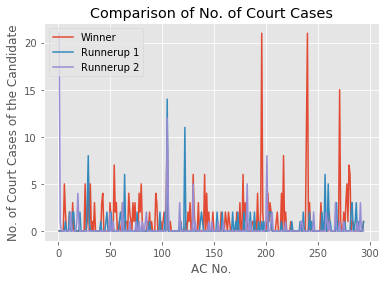

In [31]:
import numpy as np
plt.style.use("ggplot")
plt.figure()
N = np.arange(1,295)
plt.plot(N, win_case, label="Winner")
plt.plot(N, ru1_case, label="Runnerup 1")
plt.plot(N, ru2_case, label="Runnerup 2")
plt.title("Comparison of No. of Court Cases")
plt.xlabel("AC No.")
plt.ylabel("No. of Court Cases of the Candidate")
plt.legend(loc="upper left")
plt.savefig('CriminalRec.png')

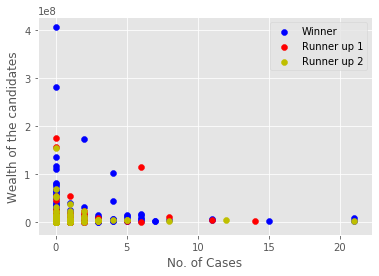

In [36]:
import numpy as np
import matplotlib.pyplot as plt


plt.scatter(win_case, win_wealth, color ='b', label = 'Winner')
plt.scatter(ru1_case, ru1_wealth, color = 'r', label = 'Runner up 1')
plt.scatter(ru2_case, ru2_wealth, color = 'y', label = 'Runner up 2')

plt.ylabel("Wealth of the candidates")
plt.xlabel("No. of Cases")
plt.legend(loc="upper right")


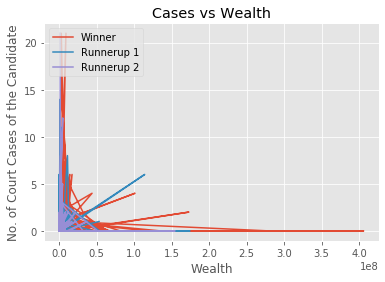

In [37]:
import numpy as np
plt.style.use("ggplot")
plt.figure()
N = np.arange(1,295)
plt.plot(win_wealth, win_case, label="Winner")
plt.plot(ru1_wealth, ru1_case, label="Runnerup 1")
plt.plot(ru2_wealth, ru2_case, label="Runnerup 2")
plt.title("Cases vs Wealth")
plt.xlabel("Wealth")
plt.ylabel("No. of Court Cases of the Candidate")
plt.legend(loc="upper left")


In [55]:
req = requests.get('https://myneta.info/westbengal2016/index.php?action=show_candidates&constituency_id=253')
soup = BeautifulSoup(req.text, 'html.parser')

In [56]:
x = soup.find('table', id = 'table1')

In [57]:
w = x.find_all('td')

In [58]:

for i in [3,10,17]:
    if i == 3:
        win_ed.append(w[i].text)
    elif i ==10:
        ru1_ed.append(w[i].text)
    elif i ==17:
        ru2_ed.append(w[i].text)

In [59]:
win_ed

['Graduate']

In [60]:
win_ed = []
ru1_ed = []
ru2_ed = []
for i in range(1,295):
    req = requests.get('https://myneta.info/westbengal2016/index.php?action=show_candidates&constituency_id={}'.format(i))
    soup = BeautifulSoup(req.text, 'html.parser')
    print(i)
    x = soup.find('table', id = 'table1')
    w =x.find_all('td')

    for k in [3,10,17]:
        if k == 3:
            win_ed.append(w[k].text)
        elif k ==10:
            ru1_ed.append(w[k].text)
        elif k ==17:
            ru2_ed.append(w[k].text)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [61]:
winner_df['Education'] = win_ed
runup1_df['Education'] = ru1_ed
runup2_df['Education'] = ru2_ed

In [67]:
winner_df['Education'].unique().shape

(9,)

In [68]:
runup1_df['Education'].unique().shape

(11,)

In [69]:
runup2_df['Education'].unique().shape

(12,)

In [72]:

X=  pd.concat([winner_df['Education'], runup1_df['Education'], runup2_df['Education'] ], ignore_index=True)

In [81]:
X.unique()

array(['Graduate', 'Graduate Professional', 'Post Graduate', '12th Pass',
       '8th Pass', 'Doctorate', '10th Pass', 'Literate', 'Others',
       '5th Pass', 'Illiterate', 'Not Given'], dtype=object)

In [111]:
w = []
X= runup2_df['Education']
for i in range(X.count()):
    if ((X[i] == 'Illiterate') or X[i]=='Not Given' or X[i]=='Others'):
        w.append(0)
    elif X[i] == 'Literate':
        w.append(1)
    elif X[i] == '5th Pass':
        w.append(2)
    elif X[i] == '8th Pass':
        w.append(3)
    elif X[i] == '10th Pass':
        w.append(4)
    elif X[i] == '12th Pass':
        w.append(5)
    elif X[i] == 'Graduate':
        w.append(6)
    elif X[i] == 'Graduate Professional':
        w.append(7)
    elif X[i] == 'Post Graduate':
        w.append(8)
    elif X[i] == 'Doctorate':
        w.append(9)


In [112]:
w = pd.DataFrame(w)

In [113]:
w[0].unique().shape

(10,)

In [114]:
runup2_df['Education'] = w[0]

In [115]:
winner_df

,Candidate Name,Party,Constituency,Email ID,Phone No.,Wealth,Age,Cases,Education
0,ARGHYA ROY PRADHAN,AITC\n,MEKLIGANJ (SC) (COOCHBEHAR),argharoy.aitmc@gmail.com,"03561-263260 , 9434806581",3870220,44,0,6
1,BINAY KRISHNA BARMAN,AITC\n,MATHABHANGA (SC) (COOCHBEHAR),binaykb2@gmail.com,9734153777,18335744,55,0,7
2,NAGENDRA NATH ROY,AIFB\n,COOCHBEHAR UTTAR (SC) (COOCHBEHAR),,9609992665,9259725,59,0,8
3,MIHIR GOSWAMI,AITC\n,COOCHBEHAR DAKSHIN (COOCHBEHAR),mihirgoswami54@gmail.com,9434367477,10330101,62,0,7
4,HITEN BARMAN,AITC\n,SITALKUCHI (SC) (COOCHBEHAR),hiten.aitc@gmail.com,03583256020,2611132,66,0,5
...,...,...,...,...,...,...,...,...,...
289,ABHIJIT ROY,AITC\n,MAYURESWAR (BIRBHUM),,8348504343,3974548,47,0,6
290,ASISH BANERJEE,AITC\n,RAMPURHAT (BIRBHUM),asishrph@yahoo.com,9434386498,15959415,64,0,9
291,MILTAN RASID,INC\n,HANSAN (BIRBHUM),,9434349272,3427605,41,0,8
292,MOINUDDIN SHAMS,AITC\n,NALHATI (BIRBHUM),aliafsar3850@gmail.com,"9831728786, 8282915437",32635702,52,0,8


In [116]:
runup1_df

,Candidate Name,Party,Constituency,Email ID,Phone No.,Wealth,Age,Cases,Education
0,BINOD ROY,Kamatapur Peoples Party (United)\n,MEKLIGANJ (SC) (COOCHBEHAR),,8116408881,21000,42,0,2
1,HAREKRISHNA SARKAR,IND\n,MATHABHANGA (SC) (COOCHBEHAR),,8016638501,424000,44,0,8
2,ANILCHANDRA ROY,SUCI(C)\n,COOCHBEHAR UTTAR (SC) (COOCHBEHAR),,"9474515689, 9563729373",504150,46,0,6
3,AKIK HOSSAIN CHOWDHURY,Kamatapur Peoples Party (United)\n,COOCHBEHAR DAKSHIN (COOCHBEHAR),kamatpurpeoplesparty@gmail.com,9818219272,113000,46,0,6
4,BAREN CHANDRA BARMAN,BJP\n,SITALKUCHI (SC) (COOCHBEHAR),,9932989105,2518183,42,0,8
...,...,...,...,...,...,...,...,...,...
289,ABUL KALAM AZAD,Welfare Party Of India\n,MAYURESWAR (BIRBHUM),,9733112033,670039,45,0,8
290,ASHIS KUMAR PAL,Mulnibasi Party of India\n,RAMPURHAT (BIRBHUM),ashishkumarpal58@gmail.com,9232681681,8509120,58,0,9
291,ALI TANSER,SP\n,HANSAN (BIRBHUM),,9564340238,126971,52,0,3
292,ABDUS SALAM,SUCI(C)\n,NALHATI (BIRBHUM),,9735588038,201500,60,0,3


In [117]:
runup2_df

,Candidate Name,Party,Constituency,Email ID,Phone No.,Wealth,Age,Cases,Education
0,DADHIRAM RAY,BJP\n,MEKLIGANJ (SC) (COOCHBEHAR),,9932347136,1264134,32,21,5
1,KANGSA RAJ BARMAN,Kamatapur Peoples Party (United)\n,MATHABHANGA (SC) (COOCHBEHAR),,9647722105,1548000,47,1,5
2,GOPAL ROY,IND\n,COOCHBEHAR UTTAR (SC) (COOCHBEHAR),,7585017585,825500,57,0,3
3,AMITA DAS,Amra Bangalee\n,COOCHBEHAR DAKSHIN (COOCHBEHAR),,9475837043,86000,54,0,6
4,FUL KUMAR BARMAN,IND\n,SITALKUCHI (SC) (COOCHBEHAR),,8158067279,105000,46,0,3
...,...,...,...,...,...,...,...,...,...
289,ARUP BAG,CPI(M)\n,MAYURESWAR (BIRBHUM),,8797624938,502333,55,0,5
290,DUDH KUMAR MONDAL,BJP\n,RAMPURHAT (BIRBHUM),,9800962905,3961072,60,3,6
291,AMAL KUMAR MONDAL,SUCI(C)\n,HANSAN (BIRBHUM),,9775719714,752000,39,0,8
292,ANIL SINGHA,BJP\n,NALHATI (BIRBHUM),,9474646276,4514646,60,0,3


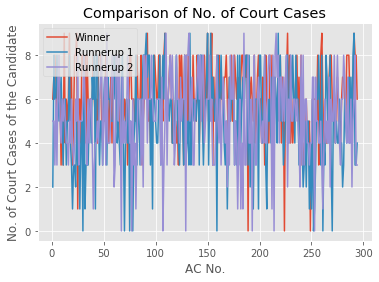

In [118]:
import numpy as np
plt.style.use("ggplot")
plt.figure()
N = np.arange(1,295)
plt.plot(N, winner_df['Education'], label="Winner")
plt.plot(N, runup1_df['Education'], label="Runnerup 1")
plt.plot(N, runup2_df['Education'], label="Runnerup 2")
plt.title("Comparison of No. of Court Cases")
plt.xlabel("AC No.")
plt.ylabel("No. of Court Cases of the Candidate")
plt.legend(loc="upper left")


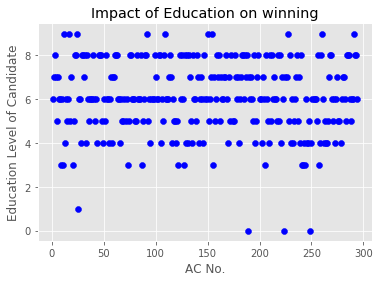

In [125]:

plt.scatter(N, winner_df['Education'], color ='b')
plt.ylabel("Education Level of Candidate")
plt.xlabel("AC No.")
plt.title('Impact of Education on winning')
plt.savefig('WinnerEd.png')

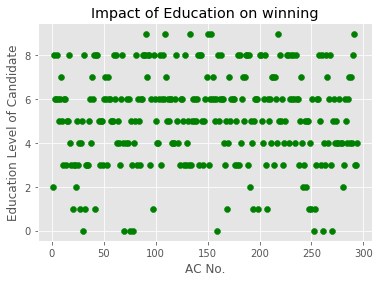

In [126]:

plt.scatter(N, runup1_df['Education'], color ='g')
plt.ylabel("Education Level of Candidate")
plt.xlabel("AC No.")
plt.title('Impact of Education on winning')
plt.savefig('Runup1Ed.png')

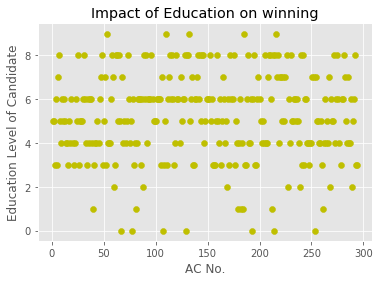

In [127]:

plt.scatter(N, runup2_df['Education'], color ='y')
plt.ylabel("Education Level of Candidate")
plt.xlabel("AC No.")
plt.title('Impact of Education on winning')
plt.savefig('Runup2Ed.png')

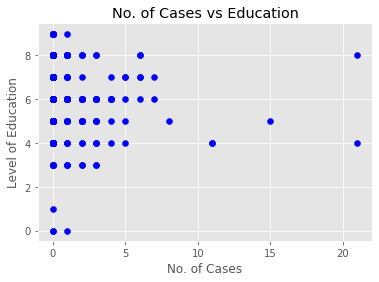

In [133]:

plt.scatter(win_case, winner_df['Education'], color = 'b')
plt.xlabel('No. of Cases')
plt.ylabel('Level of Education')
plt.title('No. of Cases vs Education')
plt.savefig('win.png')

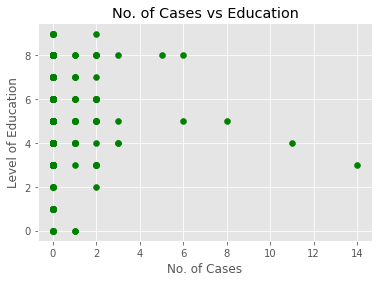

In [134]:
plt.scatter(ru1_case, runup1_df['Education'], color = 'g')
plt.xlabel('No. of Cases')
plt.ylabel('Level of Education')
plt.title('No. of Cases vs Education')
plt.savefig('ru1.png')

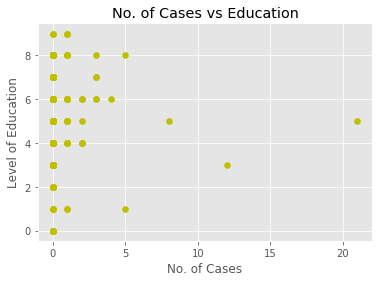

In [135]:
plt.scatter(ru2_case, runup2_df['Education'], color ='y')
plt.xlabel('No. of Cases')
plt.ylabel('Level of Education')
plt.title('No. of Cases vs Education')
plt.savefig('ru2.png')

In [136]:
winner_df.to_csv("WinnerData.csv")

In [137]:
runup1_df.to_csv("Runup1Data.csv")

In [138]:
runup2_df.to_csv("Runup2Data.csv")